# House Price Prediction Using Linear Regression

#### Importing Dependency

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Data Collection

In [2]:
df = pd.read_csv(r'/Users/manusd/Desktop/data/house.csv')

In [3]:
df.shape

(14620, 23)

#### Data Preparation

In [4]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [5]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


#### Feature Selection

In [6]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

#### Feature Selection

In [7]:
df.corr()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.045966,-0.329034,-0.516909,-0.648127,-0.100269,-0.312305,-0.112937,-0.293004,-0.045061,...,-0.068645,-0.109155,0.294709,-0.479334,-0.070841,-0.599900,-0.089604,-0.004821,-0.004542,-0.773114
Date,0.045966,1.000000,-0.015663,-0.026485,-0.021958,0.004392,-0.010335,0.012006,-0.004782,-0.027402,...,-0.005869,-0.011636,0.018243,-0.023327,-0.018231,-0.032495,-0.000050,-0.004071,0.011457,-0.027919
number of bedrooms,-0.329034,-0.015663,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,-0.516909,-0.026485,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,-0.648127,-0.021958,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,-0.100269,0.004392,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,-0.312305,-0.010335,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.112937,0.012006,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,-0.293004,-0.004782,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,-0.045061,-0.027402,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376


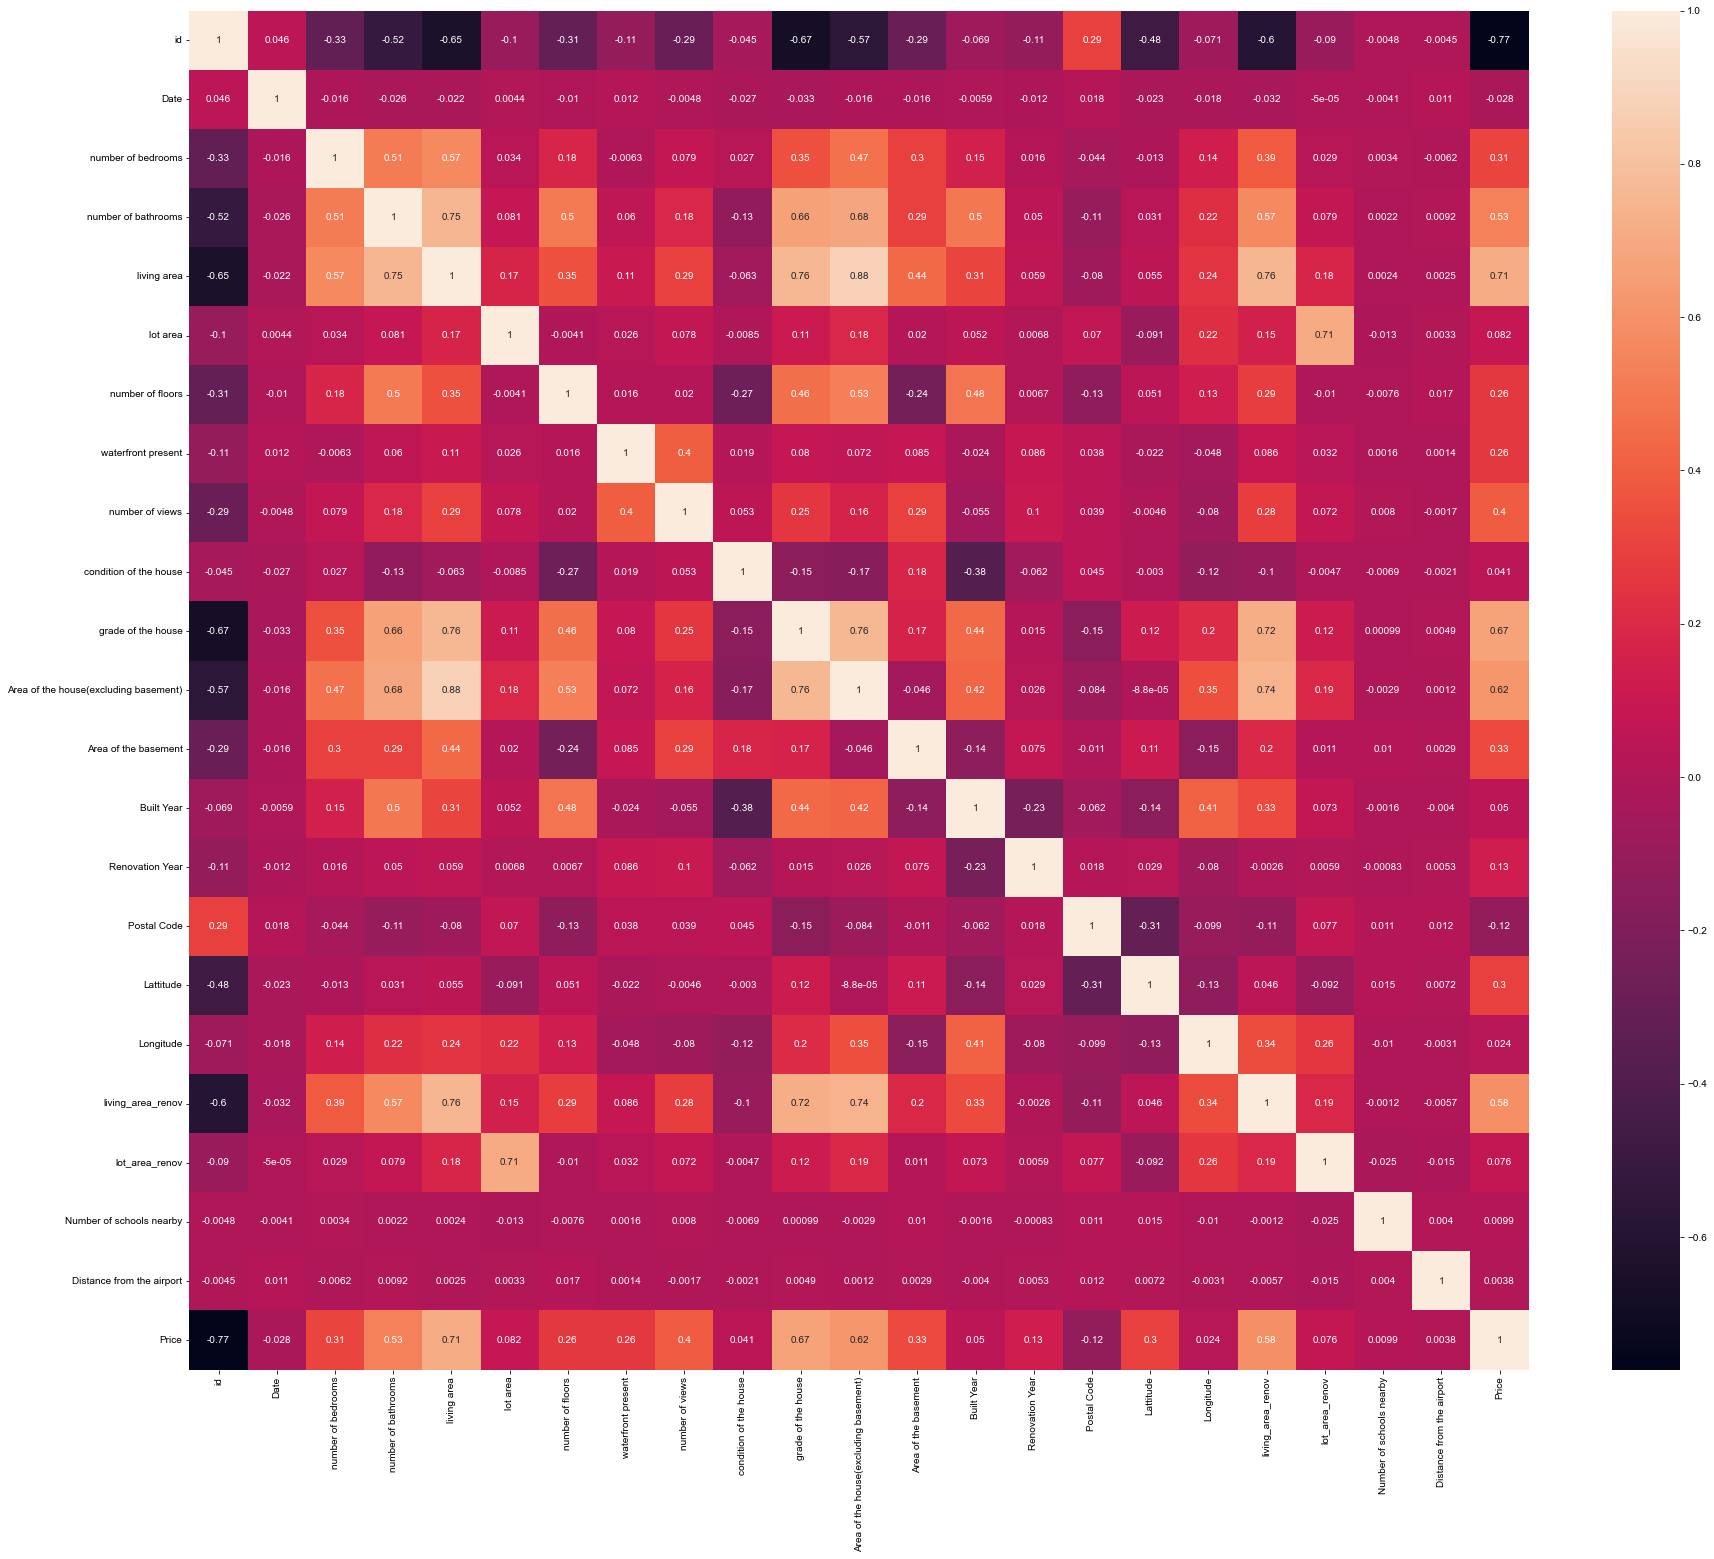

In [8]:
heatmap_df = df.select_dtypes(exclude = 'object')
plt.figure(figsize = (30,25))
sns.heatmap(heatmap_df.corr() , annot = True)
sns.set_style("darkgrid")

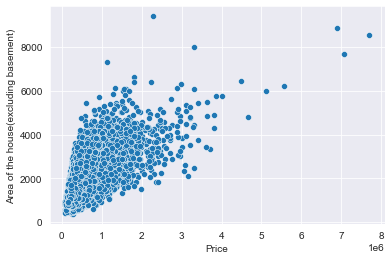

In [9]:
sns.scatterplot(data = df ,x = 'Price', y = 'Area of the house(excluding basement)')
sns.set_style("darkgrid")

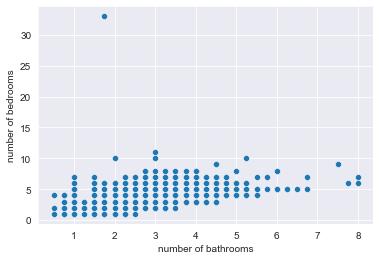

In [10]:
sns.scatterplot(data = df ,x = 'number of bathrooms' , y = 'number of bedrooms')
sns.set_style("darkgrid")

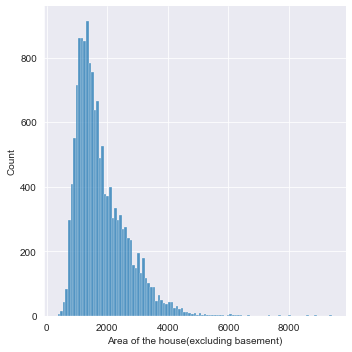

In [11]:
area =df['Area of the house(excluding basement)']
sns.displot(area)
sns.set_style("darkgrid")

In [12]:
X_df = df[['number of bedrooms','number of bathrooms','number of floors','Area of the house(excluding basement)','Built Year','Price']]

In [13]:
y = X_df.iloc[:,5:]
X = X_df.iloc[:, 0:4]
print("X shape",X.shape)
print("Y shape",y.shape)

X shape (14620, 4)
Y shape (14620, 1)


In [14]:
y.head()
X.head()

,number of bedrooms,number of bathrooms,number of floors,Area of the house(excluding basement)
0,5,2.50,2.0,3370
1,4,2.50,1.5,1910
2,5,2.75,1.5,2910
3,4,2.50,2.0,3310
4,3,2.00,1.5,1880


In [15]:
y.head()

,Price
0,2380000
1,1400000
2,1200000
3,838000
4,805000


##### Model Training

In [16]:
X_train , X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.07, random_state = 0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (13596, 4)
y_train shape:  (13596, 1)
X_test shape:  (1024, 4)
y_test shape:  (1024, 1)


In [17]:
X_train.head()

,number of bedrooms,number of bathrooms,number of floors,Area of the house(excluding basement)
5010,3,2.25,1.0,1370
9476,4,2.50,2.0,1520
5968,2,1.00,2.0,1010
1554,3,2.50,2.0,2650
1392,3,1.75,1.0,1260


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model = regressor.fit(X_train, y_train)

In [19]:
predicted_price = model.predict(X_test)

#### Model Evaluation

In [20]:
from sklearn import metrics
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predicted_price)))
print("Mean Absolute Error:", metrics.mean_absolute_error( y_test, predicted_price))
print("Mean Squared Error:", metrics.mean_squared_error( y_test,predicted_price))
print('VarScore:',metrics.explained_variance_score(y_test,predicted_price))


Root Mean Squared Error: 259711.49471576733
Mean Absolute Error: 182092.0700750737
Mean Squared Error: 67450060487.49805
VarScore: 0.342423776850434


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error( y_test,predicted_price))
r2_score = regressor.score(X_test,y_test)
print(r2_score)
print(r2_score*100,'%')

0.40023616408517637
0.34015893595182756
34.01589359518275 %


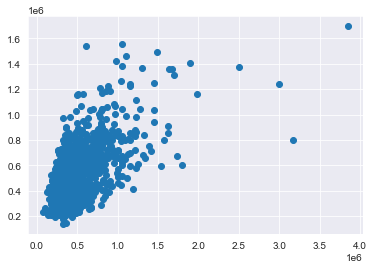

In [22]:
plt.scatter(y_test,predicted_price)


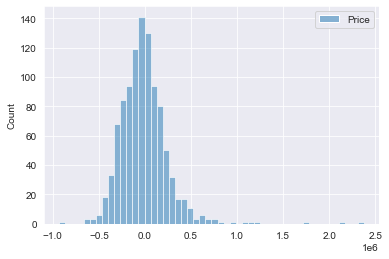

In [23]:
sns.histplot((y_test-predicted_price),bins=50); 

#### SAVING MODEL

In [24]:
import pickle

In [25]:
pickle.dump(model, open('model.pkl', 'wb'))